## Get data

In [1]:
import glob
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime, timezone
from vnstock3 import Vnstock
import requests

In [2]:
stock_list = []
volume_list = []

for i in glob.glob(r'D:\Quantitative_Research\H-Tech\vnstock_data\*.csv'):
    stocks = pd.read_csv(i).set_index('time')['close'].reset_index()
    volume = pd.read_csv(i).set_index('time')['volume'].reset_index()
    stocks.columns = ['time', i[-7:-3]]
    volume.columns = ['time', i[-7:-3]]
    stock_list.append(stocks.set_index('time'))
    volume_list.append(volume.set_index('time'))

stock_universe_price = pd.concat(stock_list, axis = 1).sort_index()
stock_universe_vol = pd.concat(volume_list, axis = 1).sort_index()

## Data handling

In [3]:
stock_universe_price.rename(columns=lambda x: x[:-1] if x != 'time' else x, inplace=True)
stock_universe_price.index = pd.to_datetime(stock_universe_price.index)
stock_universe_vol.rename(columns=lambda x: x[:-1] if x != 'time' else x, inplace=True)
stock_universe_vol.index = pd.to_datetime(stock_universe_vol.index)

## Get industry

Get all valid industries from VN stock market that have more than 3 companies

In [4]:
stock = Vnstock().stock()
industries = stock.listing.symbols_by_industries()
industry_counts = industries['en_icb_name3'].value_counts()
valid_industries = industry_counts[industry_counts >= 3].index.tolist()

print(f"Valid industries: {valid_industries}")

valid_industries = list(set(valid_industries))

2024-08-09 16:29:48,194 - vnstock3.common.vnstock - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2024-08-09 16:29:48,215 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


Valid industries: ['Construction & Materials', 'Real Estate Investment & Services', 'Industrial Transportation', 'Food Producers', 'Gas, Water & Multi-utilities', 'Chemicals', 'Personal Goods', 'Support Services', 'Electricity', 'Travel & Leisure', 'Pharmaceuticals & Biotechnology', 'Industrial Metals & Mining', 'Mining', 'Beverages', 'Financial Services', 'Industrial Engineering', 'Media', 'General Industrials', 'Banks', 'General Retailers', 'Electronic & Electrical Equipment', 'Forestry & Paper', 'Automobiles & Parts', 'Technology Hardware & Equipment', 'Software & Computer Services', 'Nonlife Insurance', 'Health Care Equipment & Services', 'Household Goods & Home Construction', 'Oil Equipment, Services & Distribution', 'Fixed Line Telecommunications', 'Food & Drug Retailers', 'Tobacco', 'Oil & Gas Producers', 'Mobile Telecommunications', 'Leisure Goods']


## Specify universe by Industry

In [5]:
stock_universe = stock_universe_price.ffill().fillna(0)
stock_universe.index = pd.to_datetime(stock_universe.index)
stock_universe.index = stock_universe.index.date
stock_universe.index.name = 'date'
stock_universe

,A32,AAA,AAM,AAS,AAT,AAV,ABB,ABC,ABI,ABR,...,XHC,XLV,XMC,XMD,XMP,XPH,YBC,YBM,YEG,YTC
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0.0,4.00,9.69,0.0,0.00,0.0,0.0,0.0,1.77,0.00,...,0.0,0.0,5.09,0.0,0.0,0.0,14.8,0.00,0.00,0.0
2013-01-03,0.0,3.89,9.46,0.0,0.00,0.0,0.0,0.0,1.77,0.00,...,0.0,0.0,4.80,0.0,0.0,0.0,14.8,0.00,0.00,0.0
2013-01-04,0.0,3.95,9.46,0.0,0.00,0.0,0.0,0.0,1.84,0.00,...,0.0,0.0,5.01,0.0,0.0,0.0,14.8,0.00,0.00,0.0
2013-01-07,0.0,3.92,9.54,0.0,0.00,0.0,0.0,0.0,1.91,0.00,...,0.0,0.0,5.01,0.0,0.0,0.0,14.8,0.00,0.00,0.0
2013-01-08,0.0,3.92,9.85,0.0,0.00,0.0,0.0,0.0,1.80,0.00,...,0.0,0.0,5.01,0.0,0.0,0.0,14.8,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18,38.9,12.05,8.22,8.2,3.88,5.8,8.3,13.1,26.47,13.65,...,20.1,8.5,7.30,6.2,17.5,7.0,7.7,11.05,10.90,36.8
2024-07-19,38.9,11.70,8.10,8.0,3.98,5.8,8.1,13.7,26.28,13.50,...,20.1,8.5,7.40,6.2,17.5,7.3,8.9,11.00,11.05,36.8
2024-07-22,35.0,11.70,8.07,7.8,4.01,6.1,8.1,13.1,26.09,13.05,...,20.1,8.5,7.30,6.2,17.5,7.0,8.9,11.00,11.05,40.9


In [6]:
vol = stock_universe_vol.fillna(0)
vol.index = pd.to_datetime(vol.index)
vol.index = vol.index.date
vol.index.name = 'date'

## Most liquid tickers

Get top 5 most liquid tickers. Already checked for valid companies info, survivorship bias,...

In [7]:
average_volume = vol.mean()
sorted_tickers = average_volume.sort_values(ascending=False)
top_3_tickers = sorted_tickers.head(30).index.tolist()
top_3_tickers = [ticker for ticker in top_3_tickers if ticker != 'FLC' and ticker != 'ROS' and ticker != 'ITA']
stock_universe = stock_universe[top_3_tickers]
stock_universe

,HPG,SHB,STB,SSI,HAG,HQC,MBB,VND,VPB,HSG,...,CTG,POW,SCR,KBC,BSR,TCB,PVD,DLG,ACB,LPB
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,1.35,2.02,13.66,4.68,17.70,3.55,2.99,1.10,0.00,2.49,...,10.07,0.00,4.44,4.28,0.0,0.00,16.04,4.46,2.90,0.00
2013-01-03,1.36,1.99,13.93,4.57,17.94,3.48,2.94,1.07,0.00,2.50,...,9.97,0.00,4.15,4.49,0.0,0.00,16.51,4.30,2.85,0.00
2013-01-04,1.40,2.12,14.07,4.63,18.66,3.41,2.97,1.12,0.00,2.58,...,10.02,0.00,4.27,4.70,0.0,0.00,16.72,4.46,2.88,0.00
2013-01-07,1.47,2.09,14.61,4.63,19.53,3.41,2.99,1.08,0.00,2.71,...,10.07,0.00,4.09,4.91,0.0,0.00,17.52,4.62,2.88,0.00
2013-01-08,1.54,2.18,14.88,4.82,20.48,3.48,3.10,1.10,0.00,2.84,...,10.16,0.00,4.33,4.84,0.0,0.00,17.78,4.46,2.90,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18,28.40,11.45,30.60,34.35,12.35,3.60,24.90,15.50,19.05,24.40,...,33.45,14.20,6.67,27.45,23.0,23.70,28.75,1.95,24.80,31.90
2024-07-19,28.20,11.30,30.30,34.80,11.95,3.50,25.40,15.90,18.80,23.75,...,33.40,13.30,6.48,27.20,22.7,23.40,28.05,1.94,25.10,32.20
2024-07-22,28.05,11.20,30.00,34.65,11.95,3.37,25.20,16.00,18.80,22.85,...,33.65,13.45,6.30,26.90,22.2,23.65,27.30,1.81,24.75,31.75


## Train-test split

In [26]:
stock_universe_train = stock_universe.iloc[:-1008]
stock_universe_test = stock_universe.iloc[-1008:]

## Relative Strength

Strategy explanation:
- Term 1 measures the difference between the price long_window periods ago and the price short_window periods ago, normalized by the short window. This provides a sense of the longer-term momentum relative to a more recent past.
- Term 2 measures the difference between the price short_window periods ago and the current price, normalized by the short window. This term captures the short-term momentum.
- The difference is the relative strength of the long-term momentum against the short-term momentum.

Signal generation:
- If the difference exceeds the threshold, it suggests a significant long-term strength, indicating that prices might have peaked, hence a sell signal.
- If the difference is negative, it indicates the short-term momentum is stronger than the long-term, suggesting a potential bottom, hence a buy signal.
- If the difference lies between 0 and the threshold, the strategy employs a momentum-based adjustment, which generates a negative signal based on the difference in today's and yesterday's prices.

In [9]:
def alpha_signal(df, long_window = 20, short_window=10, threshold = 0.25):
    alpha_df = pd.DataFrame(0, index=df.index, columns=df.columns)
    
    for col in df.columns:
        close = df[col]
        
        term1 = (close.shift(long_window) - close.shift(short_window)) / short_window
        term2 = (close.shift(short_window) - close) / short_window
        
        difference = term1 - term2
        
        alpha_df[col] = np.where(difference > threshold, -1, 
                                 np.where(difference < 0, 1, 
                                          -1 * (close - close.shift(1))))
    
    return alpha_df

## Order matrix (adjust T + 3)

Order placing logic:

**Buy signal**: If the alpha_signal is greater than the threshold
- If the last order == -1 and the stock is sold less than 3 days, do not place a new order.
- If the last order == 1, continue holding
- If no previous order, place a buy order
- If the last order == -1 and the stock is sold 3 or more days, place a buy order

**Sell signal**:  If the alpha_signal is less than the threshold and the stock holding period is 3 days or more, place a sell order

**Neutral**: 
- If the last order == 1 but the signal is not buy, hold the position (0). 
- If the last order == -1 but the signal is not sell, hold the position (0).

In [20]:
def orders(df, long_window = 15, short_window=2, threshold = 0.25):
    ords = pd.DataFrame(0, index=df.index, columns=df.columns)
    alpha_df = alpha_signal(df,
                            long_window=long_window,
                            short_window=short_window,
                            threshold=threshold
                            )
    for col in df.columns:
        last_order = 0
        holding_period = 0
        days_since_last_sell = 0
        for i in range(1, len(df)):
            if df[col].iloc[i - 1] > 0 and df[col].iloc[i] > 0:
                bull = alpha_df[col].iloc[i - 1] > 0
                bear = alpha_df[col].iloc[i - 1] < 0
                
                # print(f"Index {i}, Col {col}, Bull {bull}, Bear {bear}, Last Order {last_order}, Holding Period {holding_period}, Days Since Last Sell {days_since_last_sell}")
                
                if bull:
                    if last_order == -1 and days_since_last_sell < 3:
                        ords[col].iloc[i] = 0
                        days_since_last_sell += 1
                    elif last_order == 1:
                        ords[col].iloc[i] = 0
                        holding_period += 1
                    elif last_order == 0:
                        ords[col].iloc[i] = 1
                        last_order = 1
                        days_since_last_sell = 0
                        holding_period += 1
                    else:
                        ords[col].iloc[i] = 1
                        last_order = 1
                        days_since_last_sell = 0
                        holding_period += 1
                elif bear and holding_period >= 3:
                    ords[col].iloc[i] = -1
                    last_order = -1
                    holding_period = 0
                    days_since_last_sell += 1
                elif last_order == 1 and not bull:
                    ords[col].iloc[i] = 0
                    last_order = 1
                    holding_period += 1
                elif last_order == -1 and not bear:
                    ords[col].iloc[i] = 0
                    last_order = -1
                    days_since_last_sell += 1

    return ords

## PnL calculation (equal-weight portfolio)

In [16]:
def calculate_pnl(order_matrix, stock_universe, capital=1000000000):
    num_stocks = len(order_matrix.columns)
    capital_per_stock = capital / num_stocks
    pnl_matrix = pd.DataFrame(np.zeros_like(order_matrix.values), index=order_matrix.index, columns=order_matrix.columns)
    
    for stock in order_matrix.columns:
        buy_prices = []
        holding_days = []

        for i in range(len(order_matrix)):
            order_signal = order_matrix.iloc[i, order_matrix.columns.get_loc(stock)]
            price = stock_universe.iloc[i, stock_universe.columns.get_loc(stock)]
            
            if order_signal == 1:
                # Buy with capital allocation
                buy_price = price
                shares_to_buy = capital_per_stock / buy_price
                buy_prices.append(buy_price)
                holding_days.append(1)
                      
            elif order_signal == -1:
                sell_indices = [idx for idx, days in enumerate(holding_days) if days >= 3]
                if sell_indices:
                    pnl = round(sum((price - buy_prices[idx]) * (capital_per_stock / buy_prices[idx]) for idx in sell_indices), 2)
                    pnl_matrix.iloc[i, pnl_matrix.columns.get_loc(stock)] += pnl
                    buy_prices = [buy_prices[idx] for idx in range(len(buy_prices)) if idx not in sell_indices]
                    holding_days = [days for idx, days in enumerate(holding_days) if idx not in sell_indices]
            else:
                if len(holding_days) >= 1:
                    holding_days = [x + 1 for x in holding_days]
                    
    return pnl_matrix


## Performance matrix

In [17]:
def perf_metrics(daily_pnl_series):
    sharpe = daily_pnl_series.mean() / daily_pnl_series.std() * np.sqrt(252)
    cum_ret = daily_pnl_series.cumsum()
    running_max = cum_ret.cummax()
    drawdown = running_max - cum_ret
    if cum_ret.max() == 0:
        max_dd = np.nan
    else:
        max_dd = (drawdown.max() / cum_ret.max()) * 100
    return sharpe, max_dd

## IS backtest

Sharpe ratio: 1.39
Max drawdown: 25.05%


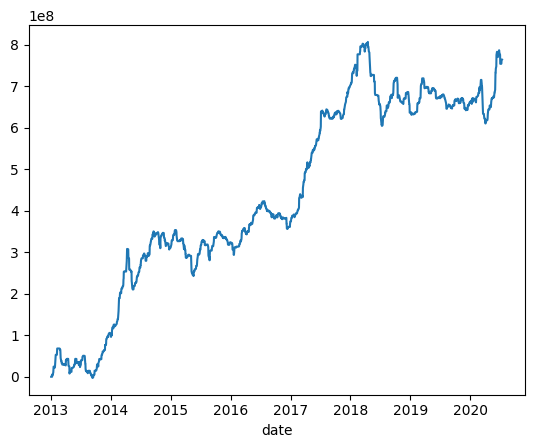

In [27]:
order_matrix = orders(stock_universe_train)
pnl_matrix = calculate_pnl(order_matrix, stock_universe_train)
universe_pnl = pnl_matrix.sum(axis=1)
universe_pnl.cumsum().plot()
sharpe, max_dd = perf_metrics(universe_pnl) 
print(f"Sharpe ratio: {sharpe:.2f}")
print(f"Max drawdown: {max_dd:.2f}%")

## OS backtest

Sharpe ratio: 2.16
Max drawdown: 18.31%


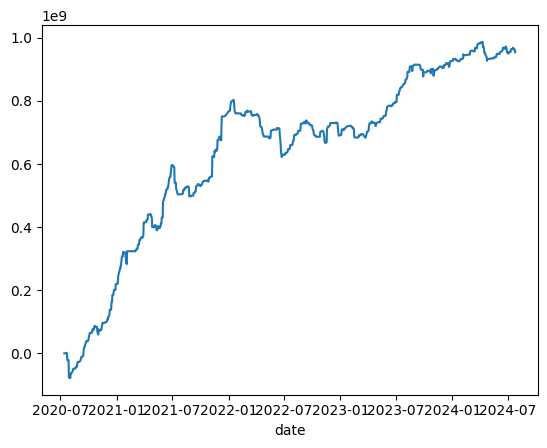

In [28]:
order_matrix = orders(stock_universe_test)
pnl_matrix = calculate_pnl(order_matrix, stock_universe_test)
universe_pnl = pnl_matrix.sum(axis=1)
universe_pnl.cumsum().plot()
sharpe, max_dd = perf_metrics(universe_pnl) 
print(f"Sharpe ratio: {sharpe:.2f}") 
print(f"Max drawdown: {max_dd:.2f}%")

phan tich ly do 

yield curve, add constraints to order logic, if in crisis, do not buy

quantify yield curve
